# Keras Basics

Welcome to the section on deep learning! We'll be using Keras with a TensorFlow backend to perform our deep learning operations.

This means we should get familiar with some Keras fundamentals and basics!

## Imports

In [1]:
import numpy as np
import pandas as pd

## Dataset

We will use the Bank Authentication Data Set to start off with. This data set consists of various image features derived from images that had 400 x 400 pixels. You should note **the data itself that we will be using ARE NOT ACTUAL IMAGES**, they are **features** of images. In the next lecture we will cover grabbing and working with image data with Keras. This notebook focuses on learning the basics of building a neural network with Keras.

_____
More info on the data set:

https://archive.ics.uci.edu/ml/datasets/banknote+authentication

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.


Attribute Information:

0. variance of Wavelet Transformed image (continuous) 
1. skewness of Wavelet Transformed image (continuous) 
2. curtosis of Wavelet Transformed image (continuous) 
3. entropy of image (continuous) 
4. class (integer) 

## Reading in the Data Set

In [2]:
data = pd.read_csv('../DATA/bank_note_data.txt', header=None)
data.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
X = data.drop(4, axis=1)
y = data[4]

In [4]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: 4, Length: 1372, dtype: int64

## Split the Data into Training and Test

Its time to split the data into a train/test set. Keep in mind, sometimes people like to split 3 ways, train/test/validation. We'll keep things simple for now. **Remember to check out the video explanation as to why we split and what all the parameters mean!**

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
 X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3 , random_state=42)

In [7]:
X_train.shape, X_test.shape, y_train.shape , y_test.shape

((960, 4), (412, 4), (960,), (412,))

## Standardizing the Data

Usually when using Neural Networks, you will get better performance when you standardize the data. Standardization just means normalizing the values to all fit between a certain range, like 0-1, or -1 to 1.

The scikit learn library also provides a nice function for this.

http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()

In [10]:
scaler = scaler.fit(X_train)

In [11]:
scaled_X_test = scaler.transform(X_test)
scaled_X_train = scaler.transform(X_train)

In [12]:
scaled_X_train.max()

1.0000000000000002

In [13]:
scaled_X_train

array([[4.66818828e-01, 5.68406755e-01, 1.65429714e-01, 6.93101291e-01],
       [5.41994245e-01, 6.41114774e-01, 3.25546495e-02, 4.20616766e-01],
       [5.84651220e-01, 8.28495736e-01, 1.66499200e-01, 6.43963513e-01],
       ...,
       [4.11050776e-04, 8.63104170e-01, 2.34046756e-01, 3.74261253e-01],
       [2.58284115e-01, 6.16029366e-01, 2.33861752e-01, 7.02643151e-01],
       [2.65661395e-01, 2.44444278e-01, 7.20316361e-01, 7.44775785e-01]])

In [14]:
scaled_X_test.max()

1.02679563427227

In [15]:
scaled_X_train.min()

0.0

In [16]:
scaled_X_test.min()

-0.0010694864308909147

## Building the Network with Keras

Let's build a simple neural network!

In [17]:
from keras.models import Sequential
from keras.layers import Dense

In [18]:
# Creates model
model = Sequential()
# INPUT LAYER
model.add(Dense(4, input_dim=4, activation='relu'))
# HIDDEN LAYER
model.add(Dense(8, activation='relu'))
# OUTPUT LAYER
model.add(Dense(1, activation='sigmoid'))

### Compile Model

In [19]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Fit (Train) the Model

In [20]:
model.fit(scaled_X_train, y_train, epochs=50, verbose=2)

Epoch 1/50
30/30 - 0s - loss: 0.6874 - accuracy: 0.5552 - 142ms/epoch - 5ms/step
Epoch 2/50
30/30 - 0s - loss: 0.6780 - accuracy: 0.5552 - 12ms/epoch - 385us/step
Epoch 3/50
30/30 - 0s - loss: 0.6710 - accuracy: 0.5552 - 11ms/epoch - 370us/step
Epoch 4/50
30/30 - 0s - loss: 0.6607 - accuracy: 0.5552 - 11ms/epoch - 380us/step
Epoch 5/50
30/30 - 0s - loss: 0.6459 - accuracy: 0.5750 - 11ms/epoch - 378us/step
Epoch 6/50
30/30 - 0s - loss: 0.6288 - accuracy: 0.6083 - 11ms/epoch - 351us/step
Epoch 7/50
30/30 - 0s - loss: 0.6081 - accuracy: 0.6896 - 11ms/epoch - 351us/step
Epoch 8/50
30/30 - 0s - loss: 0.5880 - accuracy: 0.7250 - 11ms/epoch - 377us/step
Epoch 9/50
30/30 - 0s - loss: 0.5663 - accuracy: 0.8292 - 11ms/epoch - 377us/step
Epoch 10/50
30/30 - 0s - loss: 0.5439 - accuracy: 0.8521 - 11ms/epoch - 369us/step
Epoch 11/50
30/30 - 0s - loss: 0.5195 - accuracy: 0.8917 - 11ms/epoch - 383us/step
Epoch 12/50
30/30 - 0s - loss: 0.4952 - accuracy: 0.9062 - 11ms/epoch - 373us/step
Epoch 13/50
30

In [21]:
model.metrics_names

['loss', 'accuracy']

# Evaluating Model Performance

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [23]:
preds = np.round(model.predict(scaled_X_test))

13/13 [==============================] - 0s 391us/step


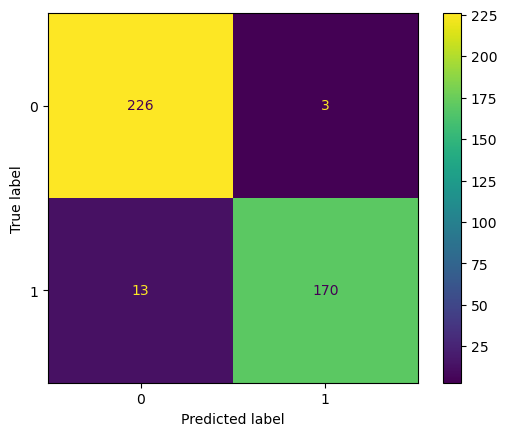

In [24]:
ConfusionMatrixDisplay.from_predictions(y_test, preds)

In [25]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       229
           1       0.98      0.93      0.96       183

    accuracy                           0.96       412
   macro avg       0.96      0.96      0.96       412
weighted avg       0.96      0.96      0.96       412

